# Assignment : 30.1 Gray

In this assignment we have compressed the racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference. The raw image is available in spicy.misc package with the name face.

In [1]:
# Import the Libraries
from skimage import io
from sklearn import cluster, datasets
from scipy import misc
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Visualize the gray scale image

f = misc.face(gray=True)
#f = misc.face()
misc.imsave('face.png', f) # save the black and white original image

C:\Users\Jaideep\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """


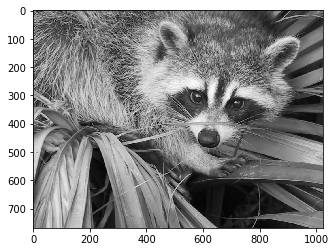

In [3]:
plt.imshow(f,cmap=plt.cm.gray)
#plt.imshow(f)
plt.show()

# Compression

In [4]:
# Flattening the image from 2-d to 1-d image

In [5]:
f.shape

(768, 1024)

In [6]:
rows = f.shape[0]
cols = f.shape[1]
print("Original Shape - Rows,Col,total : " ,rows,",",cols,":",rows*cols)

Original Shape - Rows,Col,total :  768 , 1024 : 786432


In [7]:
f1 = f.reshape(f.shape[0]*f.shape[1],1)  # for black and white images
#f1 = f.reshape(f.shape[0]*f.shape[1],3) # for colour images

In [10]:
f1.shape

(786432, 1)

In [8]:
# Implement KMeans with 5 clusters and iterations

In [9]:
kmeans = KMeans(n_clusters = 5, n_init=1, max_iter=10)
#kmeans = KMeans(n_clusters = 5, n_init=1, max_iter=100)

In [11]:
# Fitting the image into Kmeans , ie clustering of all pixels and whatever pixels are of similar colour will club together 

In [12]:
kmeans.fit(f1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
    n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
# Print the cluster centers - 5 in this case . In case this value was 3 then it would have stored the RGB values 
# and would have printed it in next step

In [14]:
clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 

In [15]:
clusters

array([[105],
       [189],
       [ 25],
       [ 68],
       [144]], dtype=uint8)

In [16]:
clusters.shape # if it was RGB then each cluster would have displayed the RGB values associated with that centroid

(5, 1)

In [17]:
# Convert the 5 centroid colours into 8 bit integer - 1 byte
# for all the pixels kmeans.labels_ will give the details as to which cluster it will belong to from the 5 clusters

In [18]:
labels = np.asarray(kmeans.labels_,dtype=np.uint8 ) 

In [19]:
kmeans.labels_

array([0, 4, 4, ..., 4, 4, 4])

In [20]:
labels = labels.reshape(rows,cols); # Making it as an image

In [21]:
labels.shape

(768, 1024)

In [22]:
np.save('codebook_racoon.npy',clusters)    # clusters centers what color they are 
io.imsave('compressed_racoon.png',labels); # labels is actually a compressed image

C:\Users\Jaideep\Anaconda\lib\site-packages\skimage\io\_io.py:140: UserWarning: compressed_racoon.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [23]:
# The original image (face.png) which is 455 KB vs the compressed image (compressed_racoon.png) which is 114KB 
# a compression factor of around 3.99 approx or nearly 4 times

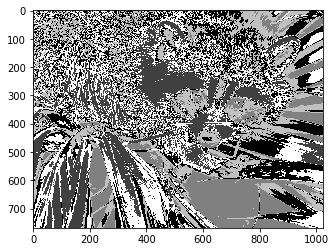

In [24]:
# display the compressed image
com_image = io.imread('compressed_racoon.png')
plt.imshow(com_image,cmap=plt.cm.gray)
plt.show()

# De-Compression

In [25]:
# load the codebook which is the cluster centers
centers = np.load('codebook_racoon.npy')
# read  the compressed image
c_image = io.imread('compressed_racoon.png')

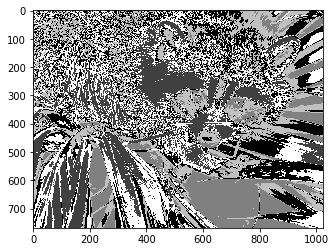

In [26]:
#display the compressed image
plt.imshow(c_image,cmap=plt.cm.gray)
plt.show()

In [27]:
centers

array([[105],
       [189],
       [ 25],
       [ 68],
       [144]], dtype=uint8)

In [28]:
c_image.shape

(768, 1024)

In [29]:
c_image

array([[0, 4, 4, ..., 0, 4, 4],
       [3, 0, 0, ..., 0, 4, 4],
       [3, 0, 0, ..., 0, 4, 4],
       ...,
       [0, 0, 0, ..., 4, 4, 4],
       [0, 0, 0, ..., 4, 4, 4],
       [0, 0, 0, ..., 4, 4, 4]], dtype=uint8)

In [30]:
c_image.shape

(768, 1024)

In [31]:
image = np.zeros((c_image.shape[0],c_image.shape[1],3),dtype=np.uint8 )

In [32]:
image.shape

(768, 1024, 3)

In [33]:
# Extracting the RGB value from the codebook(centers) and updating each pixel with the RGB value from the codebook
# This being a black and white image
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
             image[i,j,:] = centers[c_image[i,j],:]
             #print(centers[c_image[i,j],:])

In [34]:
image.shape

(768, 1024, 3)

In [35]:
image[0]

array([[105, 105, 105],
       [144, 144, 144],
       [144, 144, 144],
       ...,
       [105, 105, 105],
       [144, 144, 144],
       [144, 144, 144]], dtype=uint8)

In [36]:
image.shape

(768, 1024, 3)

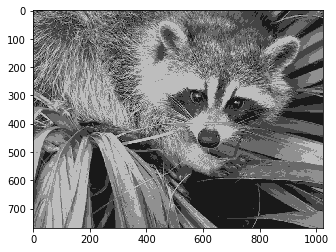

In [37]:
plt.imsave('reconstructed_racoon.png',image);
plt.imshow(image)
plt.show()

In [38]:
image.size

2359296

In [39]:
plt.show()